### Hello, Everyone.
### Welcome to My Notebook for Classification Chronic kidney disease (CKD).
## The web application for this project is available in this link
 https://ckdclassification.herokuapp.com/

## Intro
### Chronic Kidney Disease (CKD) patients are at higher risk for more severe illness. Due to immunosuppression, the kidney disease patients who appear most at risk for  COVID-19. The complications of CKD are high blood pressure, anemia (low blood count), and poor nutritional health.  So, developing a model to classify CKD patients is needed and an important to avoid the risk of this disease


## Roadmap of Notebook
###	Problem Definition
###	CKD Features
###	Analysis & Visualization.
###	Data Preprocessing
####	Data Cleaning
####	Handling Missing Values
####	Outliers
####	Splitting Data
####	Feature Selection
####	Snapshots of some visualization
###	Used machine learning models
###	Results
### Save a Model
### Try a Model


### Used Machine Learning Models
#### 1.	Decision Tree
#### 2.	Random forest 
#### 3.	SVM
#### 4.	KNN
#### 5.	XGBoost


##  1. Data  Preprocessing  

In [1]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [4]:
#read and load data csv files
data = pd.read_csv('../input/ckdisease/kidney_disease.csv')


In [5]:
#Check the 10 samples of train data
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
#Check the last 5 samples of train data
data.tail(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


### 1.1 Data Cleaning

In [7]:
#check simple information like  columns names ,  columns datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
NewCols={"bp":"blood_pressure","sg":"specific_gravity", "al":"albumin","su":"sugar","rbc":"red_blood_cells","pc":"pus_cell",
         "pcc":"pus_cell_clumps","ba":"bacteria","bgr":"blood_glucose_random","bu":"blood_urea","sc":"serum_creatinine",
         "sod":"sodium","pot":"potassium","hemo":"haemoglobin","pcv":"packed_cell_volume","wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count","htn":"hypertension","dm":"diabetes_mellitus","cad":"coronary_artery_disease",
          "appet":"appetite","pe":"pedal_edema","ane":"anemia"}

In [9]:
# Change columns of CKD data to new columns
data.rename(columns=NewCols, inplace=True)

In [10]:
#check summary of numerical data  such as count , mean , max , min  and standard deviation.
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
#check numbers of rows(samples) and columns(features)
data.shape

(400, 26)

In [12]:
#check count of values for each features
data.count()

id                         400
age                        391
blood_pressure             388
specific_gravity           353
albumin                    354
sugar                      351
red_blood_cells            248
pus_cell                   335
pus_cell_clumps            396
bacteria                   396
blood_glucose_random       356
blood_urea                 381
serum_creatinine           383
sodium                     313
potassium                  312
haemoglobin                348
packed_cell_volume         330
white_blood_cell_count     295
red_blood_cell_count       270
hypertension               398
diabetes_mellitus          398
coronary_artery_disease    398
appetite                   399
pedal_edema                399
anemia                     399
classification             400
dtype: int64

In [13]:
#Check total missing values in each feature
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

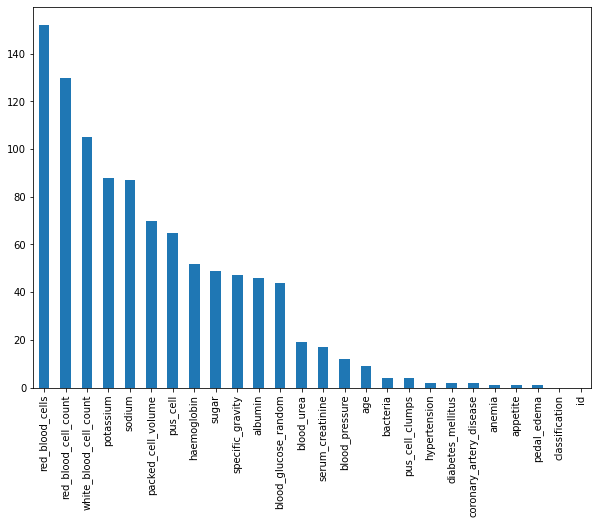

In [14]:
#visualization of null values in features
plt.subplots(figsize=(10, 7))
((data.isnull().sum())).sort_values(ascending=False).plot(kind='bar')

In [15]:
# Drop id column 
data.drop(["id"],axis=1,inplace=True) 

In [16]:
data[['red_blood_cells','pus_cell']] = data[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
data[['pus_cell_clumps','bacteria']] = data[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
data[['appetite']] = data[['appetite']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace='\tno',value=0)
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

In [17]:
data['pedal_edema'] = data['pedal_edema'].replace(to_replace='good',value=0) 
data['appetite'] = data['appetite'].replace(to_replace='no',value=0)
data['coronary_artery_disease']=data['coronary_artery_disease'].replace('yes',1)

In [18]:
##data=data.fillna(0)

### 1.2 Handling Missing Values

In [19]:
data['age']=data['age'].fillna(np.mean(data['age']))
data['blood_pressure']=data['blood_pressure'].fillna(np.mean(data['blood_pressure']))
data['albumin']=data['albumin'].fillna(np.mean(data['albumin']))


In [20]:
data['specific_gravity']=data['specific_gravity'].fillna(np.mean(data['specific_gravity']))
data['sugar']=data['sugar'].fillna(np.mean(data['sugar']))
data['blood_glucose_random']=data['blood_glucose_random'].fillna(np.mean(data['blood_glucose_random']))
data['blood_urea']=data['blood_urea'].fillna(np.mean(data['blood_urea']))
data['serum_creatinine']=data['serum_creatinine'].fillna(np.mean(data['serum_creatinine']))
data['haemoglobinhaemoglobin']=data['haemoglobin'].fillna(np.mean(data['haemoglobin']))
data['potassium']=data['potassium'].fillna(np.mean(data['potassium']))
data['sodium']=data['sodium'].fillna(np.mean(data['sodium']))


In [21]:
data = data.replace("\t?", np.nan)
data = data.replace(" ?", np.nan)
data = data.fillna(method='ffill')
data = data.fillna(method='backfill')

In [22]:
# Again ,Check missing values
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
haemoglobinhaemoglobin     0
dtype: int64

### 1.3 Outliers

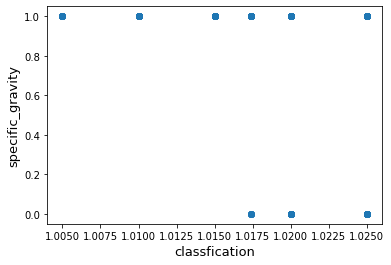

In [23]:
#check outliers
fig, ax = plt.subplots()
ax.scatter(x = data['specific_gravity'], y = data['classification'])
plt.ylabel('specific_gravity', fontsize=13)
plt.xlabel('classfication', fontsize=13)
plt.show()

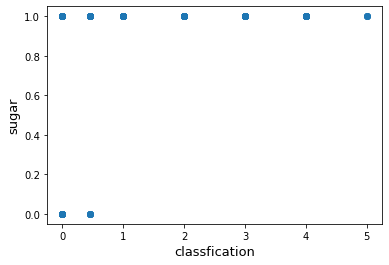

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = data['sugar'], y = data['classification'])
plt.ylabel('sugar', fontsize=13)
plt.xlabel('classfication', fontsize=13)
plt.show()

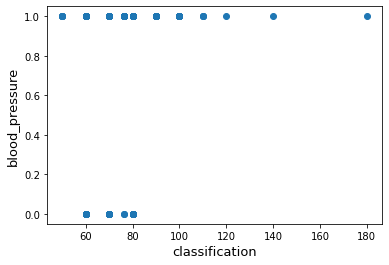

In [25]:
#check outliers
fig, ax = plt.subplots()
ax.scatter(x = data['blood_pressure'], y = data['classification'])
plt.ylabel('blood_pressure', fontsize=13)
plt.xlabel('classification', fontsize=13)
plt.show()

### 1.4 Visualization

In [26]:
numericalFeatures = data.select_dtypes(include=np.number)
categoricalFeatures = data.select_dtypes(include='object')


In [27]:
numericalFeatures

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,haemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,...,4.627244,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,15.4
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,4.627244,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.3
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,4.627244,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.6
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,2.500000,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,11.2
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,4.627244,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.000000,...,4.900000,15.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.7
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,...,3.500000,16.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.5
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,4.400000,15.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.8
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.000000,...,4.900000,14.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.2


In [28]:
datacorrnumerical=numericalFeatures.corr()
datacorrcategorical=categoricalFeatures.corr()


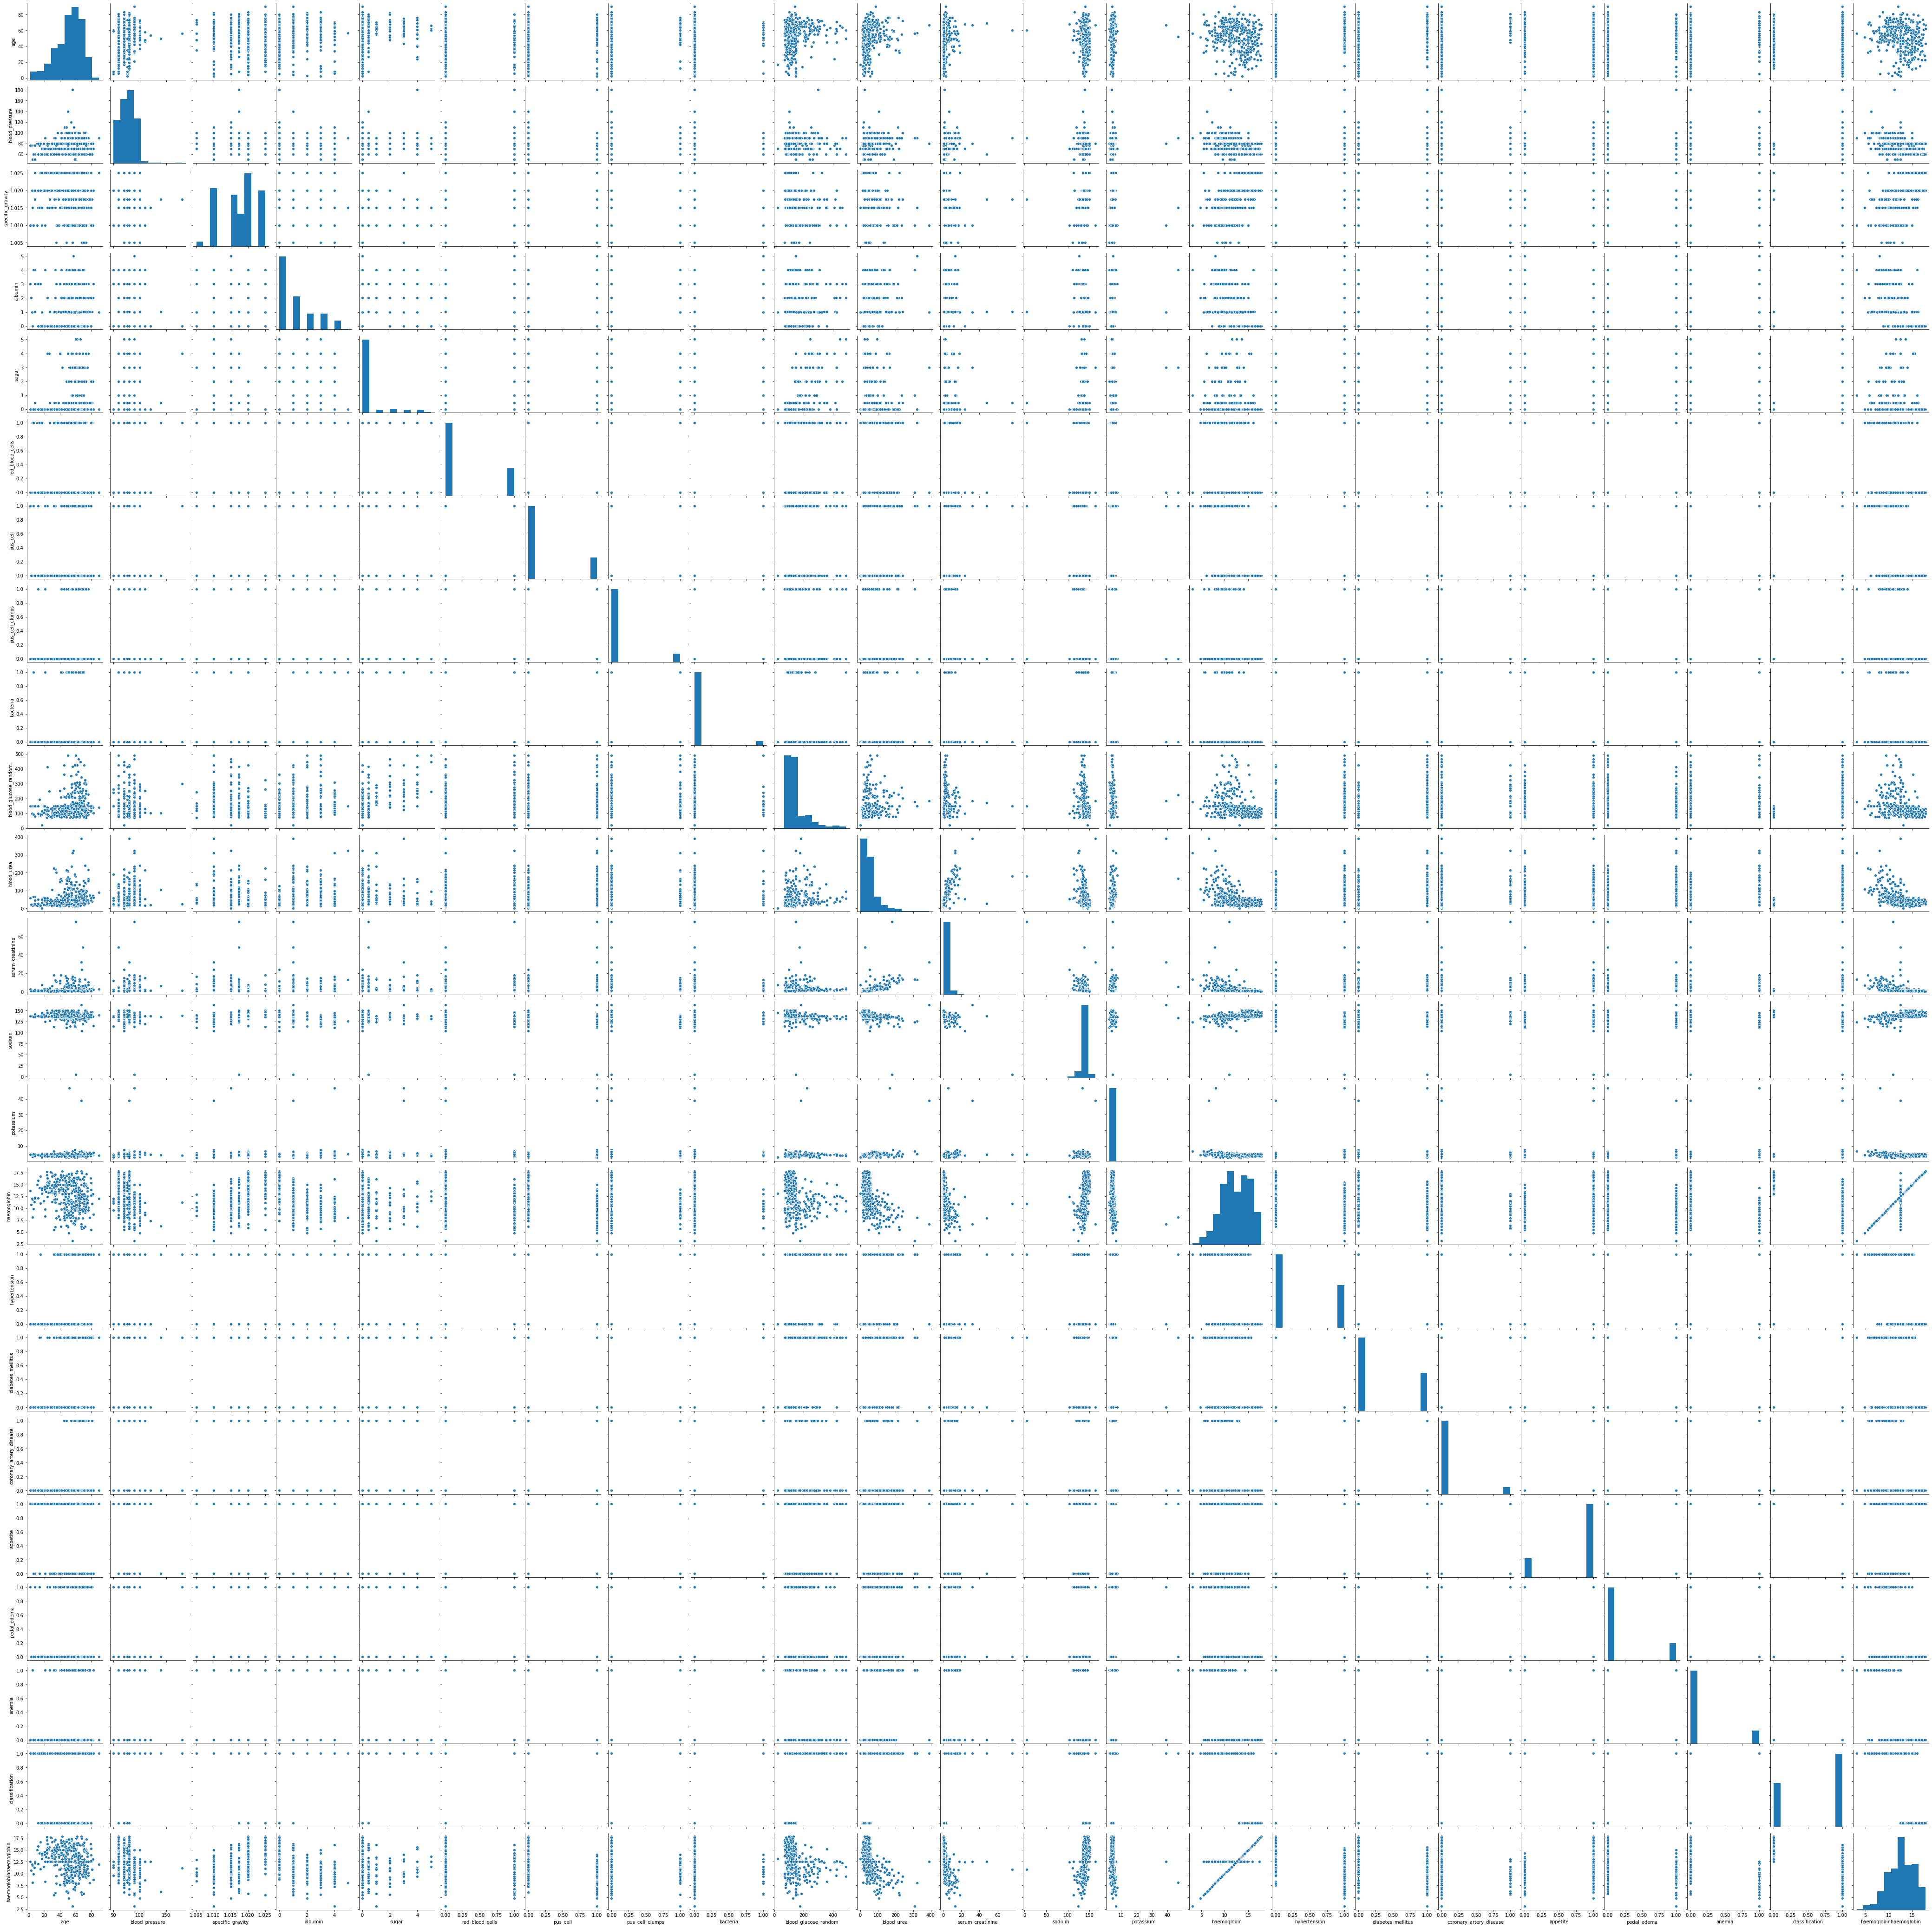

In [29]:
sns.pairplot(numericalFeatures)

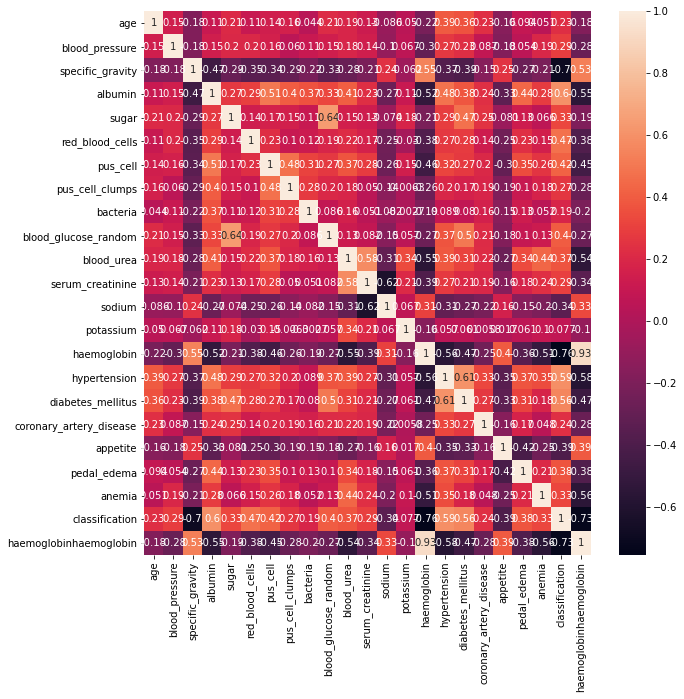

In [30]:
plt.subplots(figsize=(10, 10))
sns.heatmap(datacorrnumerical,annot=True)

Text(0, 0.5, 'age')

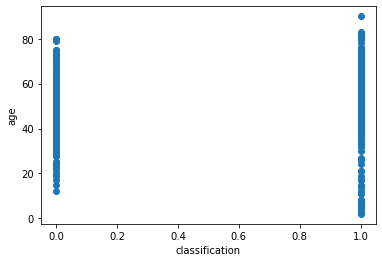

In [31]:
plt.scatter(data['classification'],data['age'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('age',fontsize=10)

Text(0, 0.5, 'blood_pressure')

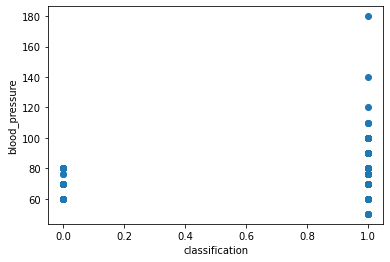

In [32]:
plt.scatter(data['classification'],data['blood_pressure'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('blood_pressure',fontsize=10)

Text(0, 0.5, 'albumin')

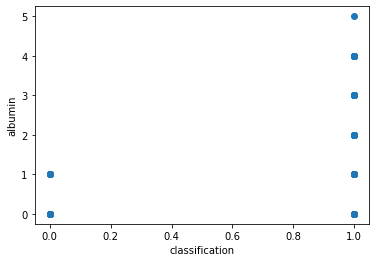

In [33]:
plt.scatter(data['classification'],data['albumin'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('albumin',fontsize=10)

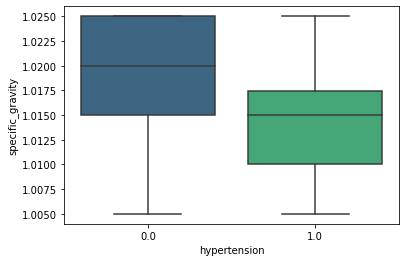

In [34]:
sns.boxplot(x='hypertension', y='specific_gravity', data=data, palette='viridis')

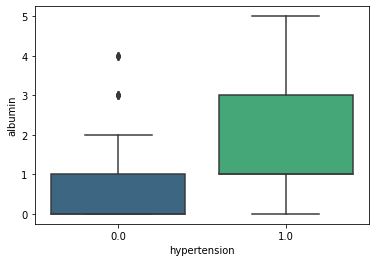

In [35]:
sns.boxplot(x='hypertension', y='albumin', data=data, palette='viridis')

In [36]:
X = data.iloc[:, :-1]
y = data.iloc[:, 24]

In [37]:
X=X.drop('classification', axis=1)

In [38]:
X=pd.DataFrame(X)

### 1.6 Feature Selection

In [39]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier()
selector = RFE(estimator=model, n_features_to_select=14)

In [41]:
selector.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=14)

In [42]:
selector.get_support(indices=True)

array([ 2,  5,  6,  7,  8,  9, 14, 15, 16, 17, 18, 19, 20, 21])

In [43]:
Features=X.columns

In [44]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 2,  5,  6,  7,  8,  9, 14, 15, 16, 17, 18, 19, 20, 21])

In [45]:
selected_featuresDT = Features[selected_features_idx]
selected_featuresDT

Index(['specific_gravity', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'blood_glucose_random', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite'],
      dtype='object')

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [47]:
rfc = RandomForestClassifier(random_state=0, criterion='gini') 

In [48]:
selector = SelectFromModel(estimator=rfc)

In [49]:
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=0))

In [50]:
x=X[selected_featuresDT]

In [51]:
x.head()

,specific_gravity,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite
0,1.020,0.0,0.0,0.0,0.0,121.000000,15.4,44,7800,5.2,1.0,1.0,0.0,1.0
1,1.020,0.0,0.0,0.0,0.0,148.036517,11.3,38,6000,5.2,0.0,0.0,0.0,1.0
2,1.010,0.0,0.0,0.0,0.0,423.000000,9.6,31,7500,5.2,0.0,1.0,0.0,0.0
3,1.005,0.0,1.0,1.0,0.0,117.000000,11.2,32,6700,3.9,1.0,0.0,0.0,0.0
4,1.010,0.0,0.0,0.0,0.0,106.000000,11.6,35,7300,4.6,0.0,0.0,0.0,1.0


### 1.6 Splitting Data

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Train Data with Decision Tree, RF, XGBoost classifier, SVM, and KNN Models 

#### Decision Tree Classiffer

In [53]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier()

In [54]:
modeldt.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y_preddt = modeldt.predict(x_test)
y_preddt

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

In [56]:
CMDT=confusion_matrix(y_test,y_preddt)
CMDT

array([[35,  0],
       [ 1, 64]])

In [57]:
print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


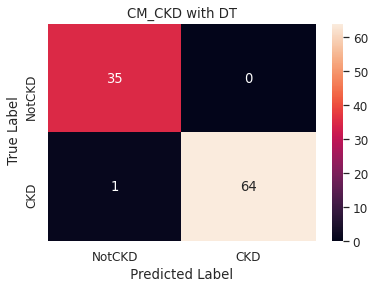

In [58]:
sns.set(font_scale=1.1)
sns.heatmap(CMDT, annot=True,fmt="g")
ax= plt.subplot()
plt.title("CM_CKD with DT")
#plt.tight_layout()
plt.ylabel(' True Label')
plt.xlabel(' Predicted Label ')
ax.xaxis.set_ticklabels(['NotCKD', 'CKD']); ax.yaxis.set_ticklabels(['NotCKD', 'CKD']);
plt.show()

In [59]:
############## DT ##########
accuracy = accuracy_score(y_test,y_preddt)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_preddt)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_preddt)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_preddt)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_preddt)
print('F1 score: %f' % f1)

Accuracy: 0.990000
Balanced_Accuracy: 0.992308
Precision: 1.000000
Recall: 0.984615
F1 score: 0.992248


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [61]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

####  Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()

In [63]:
modelRF.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
y_predrf = modelRF.predict(x_test)
y_predrf

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

In [65]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        35
         1.0       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [66]:
CMRF=confusion_matrix(y_test, y_predrf)
CMRF

array([[35,  0],
       [ 0, 65]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


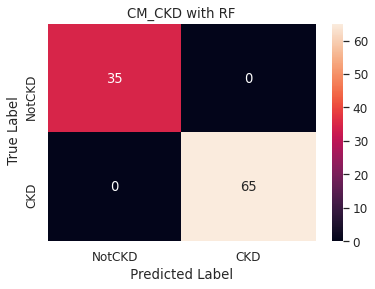

In [67]:
sns.set(font_scale=1.1)
sns.heatmap(CMRF, annot=True,fmt="g")
ax= plt.subplot()
plt.title("CM_CKD with RF")
#plt.tight_layout()
plt.ylabel(' True Label')
plt.xlabel(' Predicted Label ')
ax.xaxis.set_ticklabels(['NotCKD', 'CKD']); ax.yaxis.set_ticklabels(['NotCKD', 'CKD']);
plt.show()

In [68]:
###########  RF #############
accuracy = accuracy_score(y_test,y_predrf)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_predrf)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_predrf)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_predrf)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_predrf)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Balanced_Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


### Support Vector Machine (SVM)

In [69]:
from sklearn.svm import SVC
modelsvc = SVC(C=0.05)
modelsvc.fit(x_train, y_train)
y_predsvc = modelsvc.predict(x_test)

In [70]:
print(classification_report(y_test, y_predsvc))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        35
         1.0       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [71]:
CMsvm=confusion_matrix(y_test, y_predsvc)
CMsvm

array([[35,  0],
       [ 2, 63]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


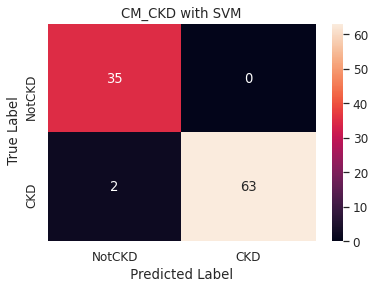

In [72]:
sns.set(font_scale=1.1)
sns.heatmap(CMsvm, annot=True,fmt="g")
ax= plt.subplot()
plt.title("CM_CKD with SVM")
#plt.tight_layout()
plt.ylabel(' True Label')
plt.xlabel(' Predicted Label ')
ax.xaxis.set_ticklabels(['NotCKD', 'CKD']); ax.yaxis.set_ticklabels(['NotCKD', 'CKD']);
plt.show()

In [73]:
############## SVM ##########
accuracy = accuracy_score(y_test,y_predsvc)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_predsvc)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_predsvc)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_predsvc)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_predsvc)
print('F1 score: %f' % f1)

Accuracy: 0.980000
Balanced_Accuracy: 0.984615
Precision: 1.000000
Recall: 0.969231
F1 score: 0.984375


### K Nearest Neighbor (KNN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=7)
modelknn.fit(x_train, y_train)
y_predknn = modelknn.predict(x_test)

In [75]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [76]:
CMknn=confusion_matrix(y_test, y_predknn)
CMknn

array([[35,  0],
       [ 1, 64]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


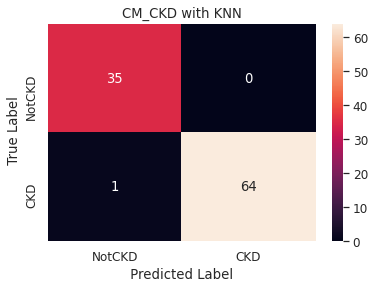

In [77]:
sns.set(font_scale=1.1)
sns.heatmap(CMknn, annot=True,fmt="g")
ax= plt.subplot()
plt.title("CM_CKD with KNN")
#plt.tight_layout()
plt.ylabel(' True Label')
plt.xlabel(' Predicted Label ')
ax.xaxis.set_ticklabels(['NotCKD', 'CKD']); ax.yaxis.set_ticklabels(['NotCKD', 'CKD']);
plt.show()

In [78]:
############# KNN ##############
accuracy = accuracy_score(y_test,y_predknn)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_predknn)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_predknn)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_predknn)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_predknn)
print('F1 score: %f' % f1)

Accuracy: 0.990000
Balanced_Accuracy: 0.992308
Precision: 1.000000
Recall: 0.984615
F1 score: 0.992248


In [79]:
from xgboost import XGBClassifier

modelxgb = XGBClassifier(n_estimators=100)
modelxgb.fit(x_train, y_train)
y_predxgb = modelxgb.predict(x_test)

In [80]:
CMxgb=confusion_matrix(y_test, y_predxgb)
CMxgb

array([[35,  0],
       [ 1, 64]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


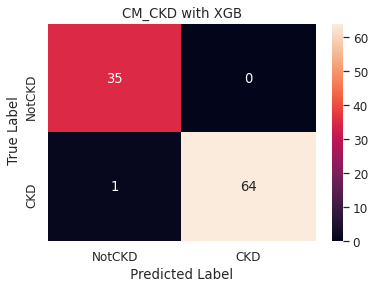

In [81]:
sns.set(font_scale=1.1)
sns.heatmap(CMxgb, annot=True,fmt="g")
ax= plt.subplot()
plt.title("CM_CKD with XGB")
#plt.tight_layout()
plt.ylabel(' True Label')
plt.xlabel(' Predicted Label ')
ax.xaxis.set_ticklabels(['NotCKD', 'CKD']); ax.yaxis.set_ticklabels(['NotCKD', 'CKD']);
plt.show()

In [82]:
########### XGBoost ################
accuracy = accuracy_score(y_test,y_predxgb)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_predxgb)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_predxgb)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_predxgb)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_predxgb)
print('F1 score: %f' % f1)

Accuracy: 0.990000
Balanced_Accuracy: 0.992308
Precision: 1.000000
Recall: 0.984615
F1 score: 0.992248


### Save a Model

In [83]:
import joblib

In [84]:
joblib.dump(model,"FinalProject_model_RF.pkl")

['FinalProject_model_RF.pkl']

In [85]:
joblib.dump(modelxgb,"FinalProject_model_xgb.pkl")

['FinalProject_model_xgb.pkl']

### Try a Model

In [86]:
predictions = [round(value) for value in y_predrf]

In [87]:
case=[1.02,0,0.0,0.0,0.0,148,11.3,38,6000,5.2,0,0,0.0,1]
case = np.array(case).reshape((1,-1))
res=modelRF.predict(case)[0]

In [88]:
str(res)

'0.0'

Many thank for  your visiting my notebook and your time.
 If my notebook is useful and helpful. Please, Upvote.